<div id="textbox">
  <p></p>
  <p class="alignleft">bis 21.03.2022</p>
  <p class="aligncenter">Fachvertiefung Mathematik</p>
  <p class="alignright">DINC Atilla</p>
</div>
<style>
#textbox {display:flex; flex-flow:row wrap;}

.alignleft {
width:33.33333%;
text-align:left;
}
.aligncenter {
width:33.33333%;
text-align:center;
}
.alignright {
width:33.33333%;
text-align:right;
}
</style>
# <p align="center">Protokoll zur 1. Übung</p>
Diese erste Übung dient zur Einführung in die Arbeit mit Python 3 und zur Einrichtung der Entwicklungsumgebungen. In der Gruppenbesprechung wurden bei Bedarf Probleme mit der Installation geklärt und der grundlegende Umgang mit Python 3 besprochen. Zur Visualisierung wird grundsätzlich die Bibliothek 'Matplotlib' verwendet. Das Protokoll wird als ein Jupyter Notebook angelegt, der vollständige Code wird jedoch separat zur Abgabe beigefügt.

## 1. Einführung und Einrichtung


## 2. Matrixassemblierung
### 2.1. Angabe
Die Python-Bibliothek soll verwendet werden, um eine NxN-Matrix zu assemblieren. Diese Matrix soll auf der Hauptdiagonalen mit dem Wert 2 und auf der 

In [7]:
import numpy as np
N = 4

M = np.zeros((4, 4))

for i in range(0, N):
    for j in range(0, N):
        if i == j:
            M[i][j] = 2
        elif abs(i - j) == 1:
            M[i][j] = -1
        else:
            M[i][j] = 0

print(M)

[[ 2. -1.  0.  0.]
 [-1.  2. -1.  0.]
 [ 0. -1.  2. -1.]
 [ 0.  0. -1.  2.]]


## 3. Matplotlib
### 3.1. Angabe

No handles with labels found to put in legend.


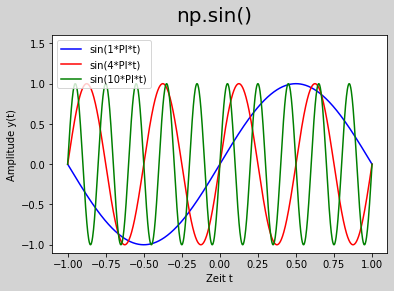

In [8]:
import numpy as np
import matplotlib.pyplot as plt

samplesize = 1000

w = [1*np.pi, 4*np.pi, 10*np.pi]
t = [-1, 1]
x = np.linspace(t[0], t[1], samplesize + 1)

# (y1, y2, y3) = (np.sin(w[0]*x), np.sin(w[1]*x), np.sin(w[2]*x))

fig = plt.figure()
fig.suptitle('np.sin()', fontsize=20)
plt.xlabel('Zeit t')
plt.ylabel('Amplitude y(t)')
plt.legend()

y1 = np.sin(w[0]*x)
y2 = np.sin(w[1]*x)
y3 = np.sin(w[2]*x)

plt.plot(x, y1, "-b", label="sin(1*PI*t)")
plt.plot(x, y2, "-r", label="sin(4*PI*t)")
plt.plot(x, y3, "-g", label="sin(10*PI*t)")
plt.legend(loc="upper left")
plt.ylim(-1.1, 1.6)

fig.patch.set_facecolor("lightgray")
plt.show()
fig.savefig("Matplotlib.jpg")

## 4. Datentypen
### 4.1. Angabe
### 4.2. Ergebnisse
a = numpy.array(x, dtype=uint8)
b = numpy.array(x, dtype=uint8)

Die Bitlänge des angegebenen Typs uint8 beträgt 8, da es sich um einen unsigned integer handelt, werden nur ausschließlich positive Ganzzahl dargestellt.
Durch die binäre Darstellung sind somit 2^8 unterschiedliche Werte darstellbar.
Da mit der Zahl 0 angefangen wird, ist der höchste Wert, der hier dargestellt werden kann die Zahl 255.

## 5. Folgen
### 4.1. Angabe

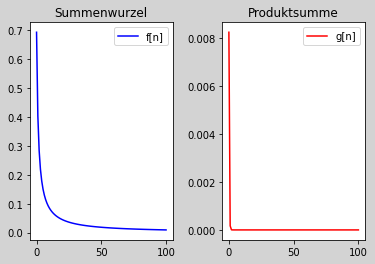

In [9]:
import numpy as np
import matplotlib.pyplot as plt

n_max = 100
n = np.arange(0, n_max+1, 1)
f = np.array(n, float)
g = np.array(n, float)

for i in n:
    sum = 0
    for j in range(0, i+1):
        sum += 1/(j+1)**2
    f[i] = np.pi - np.sqrt(6*sum)

for i in n:
    sum = 0
    for j in range(0, i+1):
        s1 = 4/(8*j+1)
        s2 = -2/(8*j+4)
        s3 = -1/(8*j+5)
        s4 = -1/(8*j+6)

        sum += (s1 + s2 + s3 + s4)/(16**j)
    g[i] = np.pi - sum

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.title.set_text("Summenwurzel")
ax1.plot(n, f, "-b", label="f[n]")
ax1.legend()

ax2.title.set_text("Produktsumme")
ax2.plot(n, g, "-r", label="g[n]")
# ax2.set_xscale("log")
ax2.legend()

fig.patch.set_facecolor("lightgray")
plt.subplots_adjust(wspace=0.35)
plt.show()
fig.savefig("Folgen.jpg")


## 6. Sinus
### 6.1. Angabe
Für den Sinus ist folgende Reihendarstellung für alle x gegeben:
$
sin_n(x)=\sum \limits _{k=0} ^{n}(-1)^k\frac{x^{2k+1}}{(2k+1)!}
\quad\quad sin(x)=\lim _{n\rightarrow \infty} sin_n(x)
$
Für diese konvergente Reihe kann an Unterschiedlichen Punkten entwickelt werden, um einen Sinus anzunähern. In dieser Aufgabe sollen die Entwicklungen mit $n = 0,...,20$ an den Stellen $x\in{\{1,10,100\}}$ durchgeführt werden. Der übrige Fehler jeder einzelnen Entwicklung soll in einem Diagramm den Konvergenzverlauf darstellen.
<br>
Die Implementierung kann aufgrund der Periodizität und Symmetrie des Sinus auf zwei Weisen optimiert werden:
>1. Entwicklungspunkte auf die $2\pi$-Periode beschränken
>2. Auswertung auf $x \in {[0,\frac{\pi}{2})}$ beschränken

Der Konvergenzverlauf dieser drei Implementierungen soll anschaulich dargestellt werden.
### 6.2. Ergebnisse

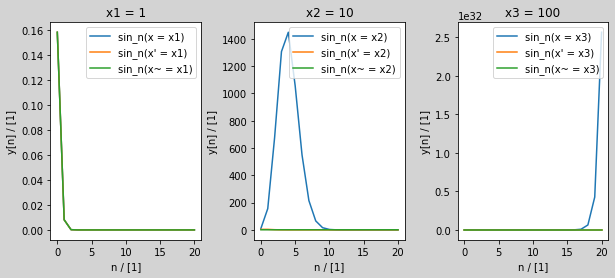

In [12]:
import matplotlib.pyplot as plt
import numpy as np


def sin_n(x, n):
    sin_x = np.array(n, float)
    for i in n:
        sum = 0
        for k in range(0, i+1):
            sum += ((-1)**k) * (x**(2*k+1)) / np.math.factorial(2*k+1)

        sin_x[i] = abs(np.sin(x) - sum)

    return sin_x


def sin_n_prime(x, n):
    sin_x = np.array(n, float)
    x_prime = x % (2 * np.pi)
    for i in n:
        sum = 0
        for k in range(0, i+1):
            sum += ((-1)**k) * (x_prime**(2*k+1)) / np.math.factorial(2*k+1)

        sin_x[i] = abs(np.sin(x) - sum)

    return sin_x


def sin_n_tilde(x, n):
    sin_x = np.array(n, float)
    x_tilde = x % (np.pi / 2)
    for i in n:
        sum = 0
        for k in range(0, i+1):
            sum += ((-1)**k) * (x_tilde**(2*k+1)) / np.math.factorial(2*k+1)

        sin_x[i] = abs(np.sin(x) - sum)

    return sin_x


def plot_sin(ax, n, sin, sin_prime, sin_tilde, dev_point_val, dev_point_title):
    ax.plot(n, sin)
    ax.plot(n, sin_prime)
    ax.plot(n, sin_tilde)
    ax.set_xlabel("n / [1]")
    ax.set_ylabel("y[n] / [1]")
    ax.set_title(dev_point_title + " = " + str(dev_point_val))
    ax.legend(["sin_n(x = " + dev_point_title + ")",
              "sin_n(x' = " + dev_point_title + ")",
               "sin_n(x~ = " + dev_point_title + ")"], loc="upper right")


n_max = 20
n = np.arange(0, n_max+1, 1)
x1 = 1
x2 = 10
x3 = 100

sin_x1 = sin_n(x1, n)
sin_x1_prime = sin_n_prime(x1, n)
sin_x1_tilde = sin_n_tilde(x1, n)

sin_x2 = sin_n(x2, n)
sin_x2_prime = sin_n_prime(x2, n)
sin_x2_tilde = sin_n_tilde(x2, n)

sin_x3 = sin_n(x3, n)
sin_x3_prime = sin_n_prime(x3, n)
sin_x3_tilde = sin_n_tilde(x3, n)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4))
plot_sin(ax1, n, sin_x1, sin_x1_prime, sin_x1_tilde, x1, "x1")
plot_sin(ax2, n, sin_x2, sin_x2_prime, sin_x2_tilde, x2, "x2")
plot_sin(ax3, n, sin_x3, sin_x3_prime, sin_x3_tilde, x3, "x3")

plt.subplots_adjust(wspace=0.35)
fig.patch.set_facecolor("lightgray")
plt.savefig("Sinus.jpg")
plt.show()


## 7. Zweitor
### 7.1. Angabe

## 8. Bisektionsverfahren
### 8.1 Angabe und Zielsetzung
Hier soll ein Algorithmus zum Finden von Nullstellen implementiert werden. Die Funktionalität wird überprüft, indem der Unterschied zwischen Ziel- und Näherungswert untersucht wird. Dazu muss lediglich die Differenz |x_n^m - pi| visualisiert werden.

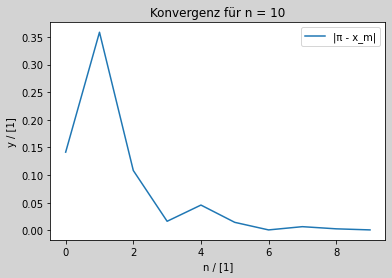

<Figure size 432x288 with 0 Axes>

In [11]:
import numpy as np
import matplotlib.pyplot as plt


def bisektion(a, b, n_max, data):
    if n_max == len(data):
        return

    x_l = a
    x_r = b

    x_m = (x_l + x_r) / 2

    if np.sign(np.sin(x_l)) == np.sign(np.sin(x_m)):
        x_l = x_m

    if np.sign(np.sin(x_r)) == np.sign(np.sin(x_m)):
        x_r = x_m

    data.append(abs(x_m - np.pi))
    bisektion(x_l, x_r, n_max, data)


n_max = 10

data = []
bisektion(2, 4, n_max, data)

fig = plt.figure()
plt.plot(data)
plt.title("Konvergenz für n = " + str(n_max))
plt.legend(["|π - x_m|"])
plt.xlabel("n / [1]")
plt.ylabel("y / [1]")

fig.patch.set_facecolor("lightgray")
plt.show()
plt.savefig("Bisektion.jpg")
